# Lets build a model them model the growth of cancer cell

### using SCINTIFIC AND   COMPUTING  METHOD 

## 🧬 Gompertzian Model for Tumor Growth

This model describes the growth dynamics of a tumor, often incorporating the effects of treatment.

### A Simple ODE (Ordinary Differential Equation)

The core equation for the model is:

$$
\frac{dT}{dt} = r T \ln\left(\frac{K}{T}\right) - c(t)T
$$

---

### Parameter Definitions

Here is a breakdown of each component in the equation:

* **$T(t)$ (Tumor Size)**
    * **Represents:** The size of the tumor at a given time $t$.
    * **Can be measured as:**
        * Number of cancerous cells
        * Tumor volume (e.g., in $mm^3$ or $cm^3$)
        * Normalized fraction (e.g., a value between 0 and 1)

* **$r$ (Tumor Growth Rate)**
    * **Represents:** How fast the tumor grows, particularly when it is small.
    * **Units:** Typically `per day` (or inverse time, $time^{-1}$).
    * **Biological Influences:**
        * Cell division rate
        * Nutrient availability
        * Angiogenesis (Blood Supply Formation)

* **$K$ (Carrying Capacity)**
    * **Represents:** The maximum tumor size that the surrounding environment can sustain.
    * **Units:** Same units as $T(t)$ (e.g., volume, cell count, or normalized size).
    * **Why growth stalls at this point:**
        1.  Lack of nutrients
        2.  Limited space
        3.  Immune system pressure

* **$c(t)$ (Chemotherapy-Induced Kill Rate)**
    * **Represents:** The rate at which chemotherapy (or any anti-cancer intervention) kills tumor cells over time.
    * **Function:** It reduces the growth of the tumor by introducing a negative pressure on the population of cancerous cells.

##### The taradiational deep learning model act as  block box and does not understand the mechanistic model behind the working of model

# **WHY NOT TO BAKE THE KNOW PYSCICAL STRUCTURE WITH THE NEURAL NETWORK**

## 🧠 Universal Differential Equations (UDE)

This approach combines known scientific models with machine learning to create more powerful predictive tools.

### The Hybrid Equation

Instead of using unknown fixed parameters, we embed neural networks directly into the differential equation to learn the complex, unknown parts.

$$
\frac{dT}{dt} = \text{[Neural Network}_1\text{]} \cdot T \cdot \ln\left(\frac{\text{[Neural Network}_2\text{]}}{T}\right) - c(t)T
$$

### Guiding Philosophy

> Why should we throw our knowledge away?
>
> Here we leverage the **"science"** of tumor growth and **"power"** of ML.

---

### The Core Concept

A Universal Differential Equation (UDE) is the fusion of these two fields:

**Differential Equations** + **Neural Network** = **Universal Differential Equations**

## 🚀 The UDE Training Workflow: From Guess to Forecast

This is the step-by-step "engine" that trains the model. It's a loop that connects the neural networks, the differential equation, and the real-world data.

### 1. The "Forward Pass" ➡️: (Prediction & Simulation)

This is where the model makes its *first guess*. It flows in this order:

1.  **Input:** Start with the *current* known tumor size, $T$. (At the very beginning, this is the initial size $T_0$).
2.  **NN Prediction:** You feed this $T$ into the two neural networks (NNs) *simultaneously*:
    * `NN1` (with its current random "knobs") predicts a value for the growth rate $r$.
    * `NN2` (with *its* current random "knobs") predicts a value for the carrying capacity $K$.
3.  **Build the Equation:** These predicted values, $r_{pred}$ and $K_{pred}$, are plugged into the Gompertz equation. Now you have a *complete* equation with *specific numbers*:
    $$
    \frac{dT}{dt} = r_{pred} \cdot T \cdot \ln\left(\frac{K_{pred}}{T}\right) - c(t)T
    $$
4.  **Numerical Analysis (Integration):** The equation above only gives you the *speed* ($\frac{dT}{dt}$). To get the *size* over time, you must solve it. A computer does this using numerical integration.
    * It starts at $T_0$.
    * It uses the equation to find the speed.
    * It takes a tiny step forward in time (e.g., 0.1 days) to predict the new size, $T_1$.
    * It repeats this process (using $T_1$ to find the speed for $T_2$, etc.) until it has generated a **full predicted tumor size curve** ($T_{predicted}$) over all 50 days.

---

### 2. The "Backward Pass" ⬅️: (Calculating & Minimizing Loss)

This is the "learning" part. The model compares its *guess* to the *reality*.

5.  **Calculate Loss:** The model now compares its predicted curve ($T_{predicted}$) with the **actual data** ($T_{true}$). It uses a **Loss Function** (e.g., Mean Squared Error) to get a single number for how "wrong" it was.
    * **Formula:** $\text{Loss} = \text{Average of } (T_{predicted} - T_{true})^2 \text{ for all time points}$.
    * A **high loss** means the guess was terrible.
    * A **low loss** means the guess was good.

6.  **Backpropagation (The "Magic"):** This is the core of "minimizing the loss."
    * The optimizer (like LBFGS) looks at the final `Loss` number.
    * It calculates *how much* each individual "knob" (weight and bias) *inside* `NN1` and `NN2` contributed to that final error.
    * It then **"nudges" all the knobs** in the direction that would have made the error smaller.

---

### 3. The Loop 🔁: (Repeat to Improve)

7.  **Iterate:** The entire process (Steps 1-6) is one "iteration" or "epoch." The model then **repeats this loop** hundreds or thousands of times.
    * **Loop 2:** The NNs (with their newly nudged knobs) make a *slightly better* prediction for $r$ and $K$.
    * **Loop 3:** The predicted curve $T_{predicted}$ is now *slightly closer* to the true data $T_{true}$.
    * **Loop 4:** The `Loss` is *slightly smaller*.
    * ...
    * **Loop 50:** After many iterations, the NNs have "learned" to predict the *true* underlying $r$ and $K$ values. The predicted curve ($T_{predicted}$) will now almost perfectly overlap with the real data ($T_{true}$), and the `Loss` will be very close to zero.

---

### 🏁 The Result: A Trained Model

You now have a fully trained UDE. The neural networks have "discovered" the hidden biological parameters ($r$ and $K$) for this specific tumor, just by looking at the size data.

In [35]:
using DifferentialEquations, JLD, DiffEqFlux, SciMLSensitivity

Since, we did not  have data we will go with creating the synthetic data

In [36]:
sigmoid(x) = 1 / (1 + exp(-x))

sigmoid (generic function with 1 method)

In [65]:
N_days = 50 
const T0=0.05f0 # Intial tumor size (normalized) --- ( 1-0) ----> this means the currently it is at 5% of its max growth

p0=[0.05f0,1.0f0,2.0f0]
u0=Float32[T0] #---- >  initial size -- 0.05
tspan = (0.0f0, Float32(N_days))

t=range(tspan[1],tspan[2],length=N_days) # this creates a set of number form this range


function tumor_growth_chemo!(du, u, p, t)  # a function to solve the odinaryDE
    T=max(u[1],0) # ----> in julia u[1]--: T||du[1] --: dT/dt
    r, K , c   = abs.(p) # unpacking the parameter 
        du[1] =  r*T*log(K/T)  - c * sigmoid(t/5) * T  # du[1] --: dT/dt || 
        #c (it is the maximum possible strength) - 2 ( which is max ) and the sigmoid is used to slowly increase the strength to maximum  (2*sigmoid(0.5) = 1) ||
        #-->  r*T*log(K/T) -- growth engin
        # The  Whole story is to [ c * sigmoid(t/5) * T ] -- model the realistic growth strength

        
end




ErrorException: invalid redefinition of constant Main.T0

In [52]:
prob=ODEProblem(tumor_growth_chemo!, u0,tspan, p0)
true_sol = Array(solve(prob, Tsit5(), saveat=t))

1×50 Matrix{Float64}:
 0.05  0.0203915  0.00786596  0.00288665  …  2.40559e-16  1.96522e-16

In [53]:
true_sol

1×50 Matrix{Float64}:
 0.05  0.0203915  0.00786596  0.00288665  …  2.40559e-16  1.96522e-16

In [54]:
using Plots

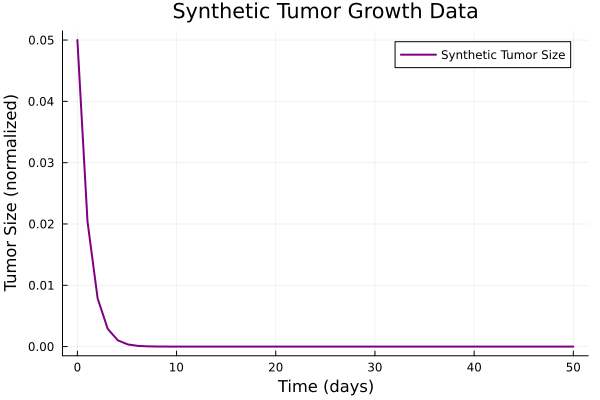

In [55]:

plot(t, true_sol[1, :],
     label = "Synthetic Tumor Size",
     linewidth = 2,
     color = :purple)

xlabel!("Time (days)")
ylabel!("Tumor Size (normalized)")
title!("Synthetic Tumor Growth Data")

# Now we are creating the UDE to solve the equation

$$
    \frac{dT}{dt} = r_{pred} \cdot T \cdot \ln\left(\frac{K_{pred}}{T}\right) - c(t)T
    $$

In [56]:
using Random, ComponentArrays

In [57]:
rng=Random.default_rng()

# both the two neural network

NN_r=Lux.Chain(Lux.Dense(1,10, relu), Lux.Dense(10, 1))
NN_k=Lux.Chain(Lux.Dense(1,10, relu), Lux.Dense(10, 1))

p1,st1 = Lux.setup(rng, NN_r)   # p are parameter that are to be optimized during training

p2, st2 = Lux.setup(rng, NN_k)   # st - these are not trainanble parameter they just sotre the things like  batch norm
p0_vec = (layer_r = p1, layer_k = p2)  # this convert the parameters into --> p0_vec = (
                                       #                                                 layer_r = (weight = 1.1, bias = 2.2),
                                       #                                                 layer_k = (weight = 3.3, bias = 4.4)
                                       #                                                 )
p0_vec = ComponentArray(p0_vec)     
## What the optimizer sees:
#  [1.1, 2.2, 3.3, 4.4]

## Your code can still do this:
# julia> p0_vec.layer_r
# (weight = 1.1, bias = 2.2)---> HUMAN READABLE 

# julia> p0_vec.layer_k.bias ---> optimizer READABLE
# 4.4


ComponentVector{Float32}(layer_r = (layer_1 = (weight = Float32[2.2234397; 2.925424; … ; -2.2551045; 3.3322036;;], bias = Float32[0.15992594, 0.52602255, 0.5430881, -0.78279305, 0.30234385, 0.7704282, -0.7856387, -0.20836961, 0.97086537, -0.27152956]), layer_2 = (weight = Float32[-0.110061474 -0.19230413 … -0.18923853 -0.086591095], bias = Float32[-0.2710225])), layer_k = (layer_1 = (weight = Float32[0.1282562; 2.8191688; … ; 1.1016667; 1.3113536;;], bias = Float32[0.9124485, -0.82269335, 0.6852764, -0.8218311, 0.5393659, -0.9684348, 0.33390903, -0.97692144, 0.9656329, -0.61289287]), layer_2 = (weight = Float32[0.4915695 0.3725001 … -0.32269248 -0.09413844], bias = Float32[0.18174224])))

In [58]:
function  my_softplus(x)
    return log(1 + exp(x))
    
end

my_softplus (generic function with 1 method)

In [59]:
function tumor_UDE!(du,u,p,t)
    T=max(u[1] , 0.0f0)  # so that the growth of the tumor cannot be negative

    r_out , _ = NN_r([T] , p.layer_r , st1)  # getting the parameter from the neural network
    k_out , _ = NN_k([T] , p.layer_k , st2) # Changed NN_r to NN_k

    r = clamp(my_softplus(r_out[1]), 1.0f-4, 1.0f0)
    K = clamp(my_softplus(k_out[1]), 0.01f0, 1.0f0) # Changed K_out to k_out

    du[1]=r*T*log(K/T)-p0[3]*sigmoid(t/5.0f0)*T
end

ude_prob = ODEProblem(tumor_UDE!,u0,tspan,p0_vec)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
Non-trivial mass matrix: false
timespan: (0.0, 50.0)
u0: 1-element Vector{Float64}:
 0.05

### The loss function 

In [ ]:
function loss_function(p)
    local_u0 = Float32.(u0)
    local_ude_prob = ODEProblem(tumor_UDE!,local_u0,tspan,p)
    sol=solve(local_ude_prob, p=p , saveat=t, sensealg=AutoZygote()) # solving the UDE prob
    if any(x -> any(isnan,x)    ,sol.u) || length(sol.t) != length(t) 
        return Inf
    end

    return sum( abs2 , sol[1, :] .- true_sol[1, :])
end


# The if statement if (Condition 1) || (Condition 2) means: "If the solution contains a NaN OR if the solver didn't finish the full time span..."
# In our "Bad" example, both conditions were true, so the function would return Inf, and the optimizer would know its last attempt was a complete failure.
# end

loss_function (generic function with 1 method)

### Optimzing the Neural Network


In [61]:
using Optimization, OptimizationOptimJL

In [ ]:
opt_func = OptimizationFunction((x,p) -> loss_function(x) , Optimization.AutoZygote() )  #  Creating an Optimization prob 
opt_prob = OptimizationProblem(opt_func, p0_vec)  # otimizing the parameter
trained_params = solve(opt_prob, OptimizationOptimJL.LBFGS(); maxiters=5)

String: "Error cannot store inactive but differentiable variable [0.05] into active tuple"